# Optimization & Training (Beginner)

- tf와 layers 패키지 불러오기

In [1]:
import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras import datasets

## 학습 과정 돌아보기

![image.png](attachment:image.png)

# Prepare MNIST Datset

In [2]:
(train_x, train_y), (test_x, test_y) = datasets.mnist.load_data()

## Build Model

![image.png](attachment:image.png)

In [3]:
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

# Optimization  
모델을 학습하기 전 설정 

- Loss Function  
- Optimization  
- Metrics

# Loss Function  
Loss Function 방법 확인

### Categorical vs Binary

In [4]:
loss = 'binary_crossentropy'
loss = 'categorical_crossentropy'

### sparse_categorical_crossentropy vs categorical_crossentropy

In [5]:
loss_fun = tf.keras.losses.sparse_categorical_crossentropy

In [6]:
tf.keras.losses.categorical_crossentropy

<function tensorflow.python.keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>

In [7]:
tf.keras.losses.binary_crossentropy

<function tensorflow.python.keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0)>

# Metrics  

모델을 평가하는 방법

accuracy를 이름으로 넣는 방법

In [10]:
metrics = ['accuracy']

tf.keras.metrics.

In [9]:
metrics = [tf.keras.metrics.Accuracy()]

## Compile  
Optimizer 적용

- 'sgd'
- 'rmsprop'
- 'adam'

In [11]:
optm = tf.keras.optimizers.Adam()

- tf.keras.optimizers.SGD()  
- tf.keras.optimizers.RMSprop()    
- tf.keras.optimizers.Adam()  

In [12]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# Prepare Dataset  
학습에 사용할 데이터셋 준비

shape 확인

In [13]:
train_x.shape, train_y.shape

((60000, 28, 28), (60000,))

In [14]:
test_x.shape, test_y.shape

((10000, 28, 28), (10000,))

차원 수 늘리기

In [15]:
import numpy as np

In [16]:
np.expand_dims(train_x, -1).shape

(60000, 28, 28, 1)

In [17]:
tf.expand_dims(train_x, -1).shape

TensorShape([60000, 28, 28, 1])

In [18]:
train_x = train_x[..., tf.newaxis]
test_x = test_x[..., tf.newaxis]

차원 수 잘 늘었는지 확인

In [19]:
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

Rescaling

In [20]:
np.min(train_x), np.max(train_x)

(0, 255)

In [21]:
train_x = train_x / 255.
test_x = test_x / 255.

In [22]:
np.min(train_x), np.max(train_x)

(0.0, 1.0)

# Training  
본격적으로 학습 들어가기

학습용 Hyperparameter 설정

- num_epochs
- batch_size

In [23]:
num_epochs = 1
batch_size = 32

- model.fit

In [24]:
model.fit(train_x, train_y, batch_size=batch_size, shuffle=True, epochs=num_epochs)

1875/1875 [==============================] - 116s 62ms/step - loss: 0.1468 - accuracy: 0.9531


# Check History  
학습 과정(History) 결과 확인

In [26]:
history = model.fit(train_x, train_y, batch_size=batch_size, shuffle=True, epochs=num_epochs)

1875/1875 [==============================] - 133s 71ms/step - loss: 0.0574 - accuracy: 0.9830s - loss: 0.0575 - accuracy: 


In [ ]:
history.history['loss']

![LeNet5](https://miro.medium.com/max/1064/0*u-yUNdr5JhIDgmYs)

In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2, 2], [2, 2]])/255
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2]])/255
x_train.shape, x_test.shape

x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train.shape, x_test.shape

x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000:,:,:,]
y_train = y_train[:-2000]

model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(15, 5, activation='tanh'))
model.add(layers.AveragePooling2D(2))
model.add(layers.Activation('sigmoid'))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Flatten())
model.add(layers.Dense(84, activation='tanh'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
history = model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
activation_8 (Activation)    (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 10, 10, 15)        2265      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 15)          0         
_________________________________________________________________
activation_9 (Activation)    (None, 5, 5, 15)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 1, 1, 120)        

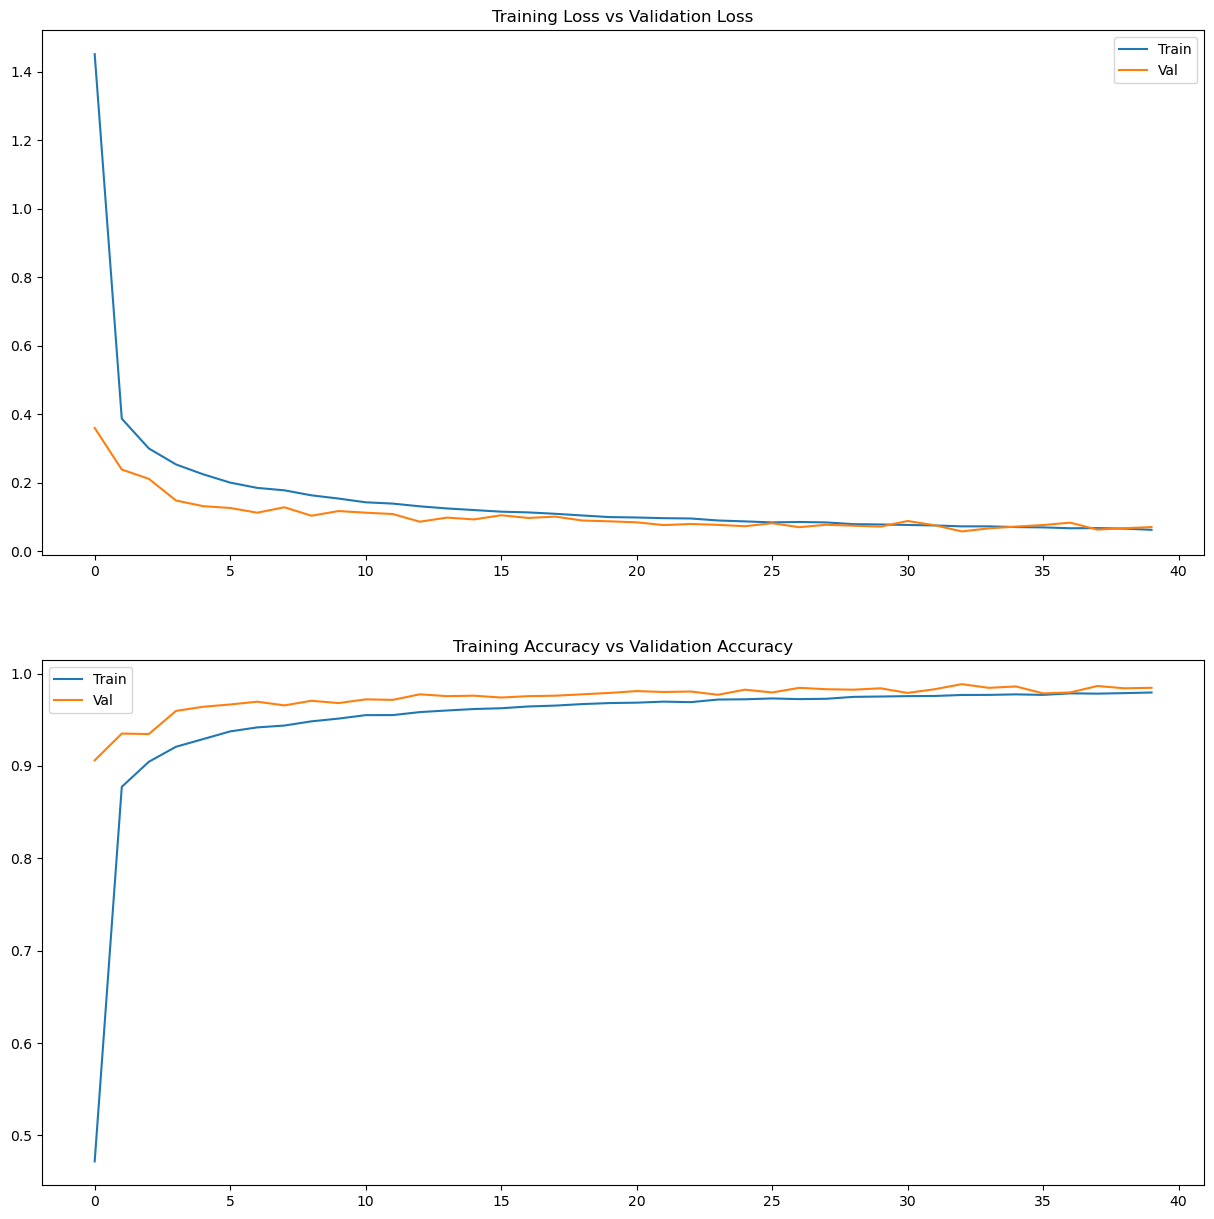

In [33]:
fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])
plt.show()

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0877 - accuracy: 0.9737


[0.087736576795578, 0.9736999869346619]

![AlexNet](https://miro.medium.com/max/1400/0*hhd-belzmau_TMcF.png)

In [35]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2, 2], [2, 2]])/255
x_test = tf.pad(x_test, [[0, 0], [2, 2], [2, 2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)

x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000:,:,:,]
y_train = y_train[:-2000]

model = models.Sequential()
model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation='bilinear', input_shape=x_train.shape[1:]))
model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))
model.add(layers.Flatten())
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

fig, axs = plt.subplots(2, 1, figsize=(15, 15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].legend(['Train', 'Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].legend(['Train', 'Val'])
plt.show()

model.evaluate(x_test, y_test)